# Accident Severity Prediction
<img src="https://s3-ap-southeast-1.amazonaws.com/assets.skyfilabs.com/images/displaypictures/accident-detection-system-with-gps-gsm.png" height="600px" width="600px">

## Introduction
Neeraj at Karnataka Transportation Safety Authority is planning to set up traffic safety signs at places where a critical accident occurs and offer a safety guide to drivers in order to lessen the damage of a car accident.
He wants to analyze which driving conditions (road condition, speed limit, illumination, day of week et al) are more prone to a critical accident and come up with countermeasures.
Thus, he is planning to create and compare tree-based classifiers by training with the past accidents over the year and identify key variables.

## Objectives
- Use Tree-based functions to analyze the severity of traffic accidents and identify key variables
- Use Split Data to separate training and validation data
- Run repetitive statements to find an optimal depth of Decision Tree and Evaluate Multiclass Classification to compare performance by depth and find an optimal depth
- Use Decision Tree (for depth optimization) and Random Forest (default) function to train a learning model for traffic accident data and evaluate the model performance using test data
- Use Binary Classification to validate the accuracy of respective models
- Use filter to retain only key variables at each tree’s top node of Random Forest and sort and check key variables by assigning weight to the key variables 
<br/><br/><br/><br/><center>Let's get started.....</center>

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.preprocessing import MinMaxScaler
from scipy.special import boxcox1p

from imblearn.over_sampling import SMOTE

from sklearn.metrics import accuracy_score

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option("display.max_columns",28)
pd.set_option("display.max_rows",100)

import warnings
warnings.filterwarnings("ignore")

c:\users\avenger\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
c:\users\avenger\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
c:\users\avenger\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWa

## 2. Load the DataSet

In [2]:
data = pd.read_csv("60_car_accident_2016.csv")
data.head()

,Accident_Index,Accident_Severity,First_Road_Class,Speed_limit,Light_Conditions,Weather_Conditions,Day_of_Week_6,Day_of_Week_5,Day_of_Week_4,Day_of_Week_3,Day_of_Week_2,Day_of_Week_7,Road_Type_6,Road_Type_3,Road_Type_1,Road_Type_2,Road_Type_7,Junction_Control_4,Junction_Control_2,Junction_Control_3,Junction_Control_0,Road_Surface_Conditions_1,Road_Surface_Conditions_2,Road_Surface_Conditions_4,Road_Surface_Conditions_3,Urban_or_Rural_Area_1,Urban_or_Rural_Area_2
0,2016320136956,0.0,5.0,30.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2016010021162,0.0,3.0,30.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,2016610051916,0.0,3.0,40.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,2016100139498,0.0,4.0,30.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,2016420087263,1.0,4.0,60.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


## 3. Analyze the DataSet 
### 3.1. Check the shape of the DataSet

In [3]:
data.shape

(6512, 27)

### 3.2. Summary of the features

In [4]:
data.describe()

,Accident_Severity,First_Road_Class,Speed_limit,Light_Conditions,Weather_Conditions,Day_of_Week_6,Day_of_Week_5,Day_of_Week_4,Day_of_Week_3,Day_of_Week_2,Day_of_Week_7,Road_Type_6,Road_Type_3,Road_Type_1,Road_Type_2,Road_Type_7,Junction_Control_4,Junction_Control_2,Junction_Control_3,Junction_Control_0,Road_Surface_Conditions_1,Road_Surface_Conditions_2,Road_Surface_Conditions_4,Road_Surface_Conditions_3,Urban_or_Rural_Area_1,Urban_or_Rural_Area_2
count,6512.000000,6512.000000,6512.000000,6512.000000,6512.000000,6512.000000,6512.000000,6512.000000,6512.000000,6512.000000,6512.000000,6512.000000,6512.000000,6512.000000,6512.000000,6512.000000,6512.000000,6512.000000,6512.000000,6512.000000,6512.000000,6512.000000,6512.000000,6512.000000,6512.000000,6512.000000
mean,0.281787,3.374693,38.846744,1.876075,1.440571,0.156787,0.157709,0.152181,0.147574,0.137592,0.135903,0.687654,0.139281,0.130221,0.020270,0.017813,0.773956,0.197021,0.009674,0.015817,0.741554,0.247850,0.008753,0.001382,0.598434,0.401566
std,0.449905,0.736706,13.671885,1.508945,1.476119,0.363628,0.364496,0.359223,0.354704,0.344498,0.342712,0.463486,0.346266,0.336572,0.140934,0.132282,0.418300,0.397779,0.097889,0.124776,0.437814,0.431797,0.093155,0.037153,0.490253,0.490253
min,0.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,4.000000,50.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,5.000000,70.000000,6.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 3.3. Distribution of the target attribute

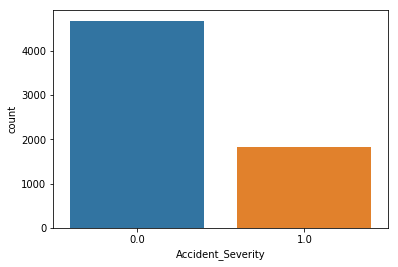

In [5]:
sns.countplot(data.Accident_Severity)

## 4. EDA
### 4.1. Univariate Analysis
Checking distribution of Speed_limit attribute

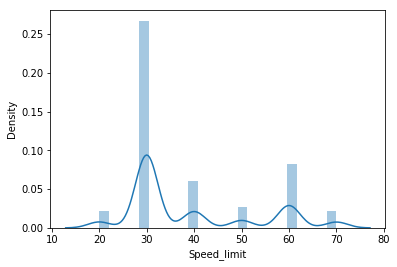

In [6]:
ax = sns.distplot(data.Speed_limit)

### 4.2. Bivariate Analysis
#### 4.2.1. FOR NUMERICAL : Numerical Attributes Vrs Accident_Severity : By BoxPlot

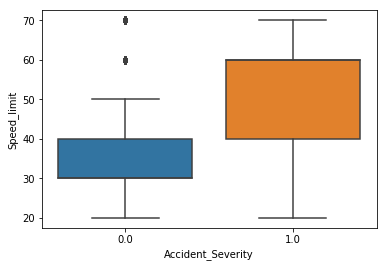

In [7]:
sns.boxplot(x=data.Accident_Severity, y=data.Speed_limit)

<b><u>Conclusion:</u></b><br/>
***Here we can observe that if the speed limit of the vehicle is more than 40 then there, the accident is very likely to occur.***

#### 4.2.2. Correlation plot of Independent attributes

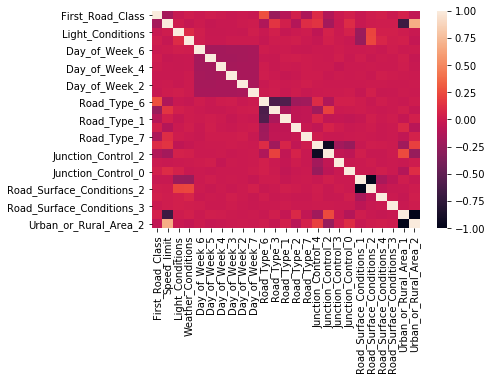

In [8]:
corr = data.drop(["Accident_Severity"],axis=1).corr()
sns.heatmap(corr)

<b><u>Conclusion:</u></b><br/>
***Road_Surface_Conditions_2 is negatively correlated with Road_Surface_Conditions_1 with correlation of 97.24%.***<br/>
***Urban_or_Rural_Area_1 is negatively correlated with Urban_or_Rural_Area_2 with correlation of 100.00%***

***So here we can remove Road_Surface_Conditions_2 and Urban_or_Rural_Area_1 due to collinearity***

### 4.3. Checking for missing values

In [9]:
data.isna().sum()

Accident_Index               0
Accident_Severity            0
First_Road_Class             0
Speed_limit                  0
Light_Conditions             0
Weather_Conditions           0
Day_of_Week_6                0
Day_of_Week_5                0
Day_of_Week_4                0
Day_of_Week_3                0
Day_of_Week_2                0
Day_of_Week_7                0
Road_Type_6                  0
Road_Type_3                  0
Road_Type_1                  0
Road_Type_2                  0
Road_Type_7                  0
Junction_Control_4           0
Junction_Control_2           0
Junction_Control_3           0
Junction_Control_0           0
Road_Surface_Conditions_1    0
Road_Surface_Conditions_2    0
Road_Surface_Conditions_4    0
Road_Surface_Conditions_3    0
Urban_or_Rural_Area_1        0
Urban_or_Rural_Area_2        0
dtype: int64

<b><u>Conclusion: </u></b><br/>
***Here we can observe that there is no missing values in our dataset.***

## 5. Data Preparation
### 5.1. Taking care of Outliers by Normalizing the Data : By MinMax Normalization

In [10]:
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(data.Speed_limit.to_numpy().reshape(-1,1))
x_scaled

array([[0.2],
       [0.2],
       [0.4],
       ...,
       [0.2],
       [0.2],
       [0.2]])

In [11]:
df_scaled = pd.DataFrame(x_scaled,columns=['Speed_limit'])
df_scaled.head(3)

,Speed_limit
0,0.2
1,0.2
2,0.4


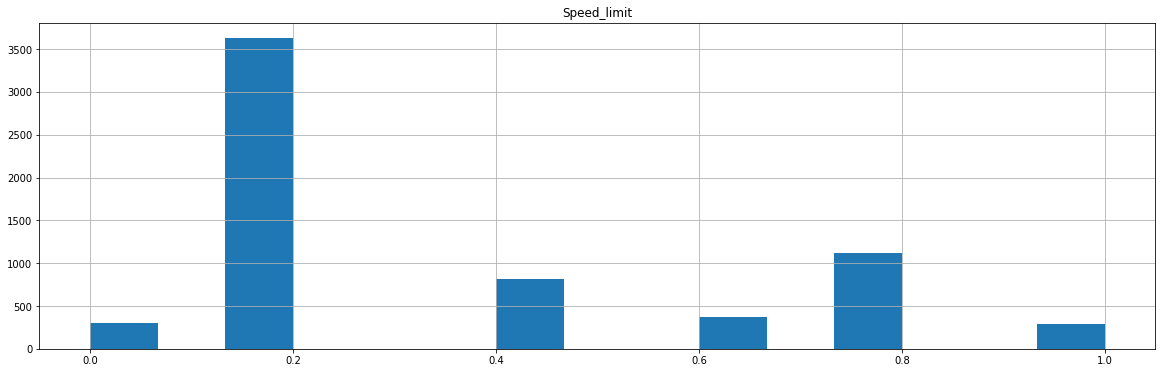

In [12]:
df_scaled.hist(bins=15, figsize=(20, 6), layout=(1, 1));

### 5.2. Taking care of Outliers by Normalizing the Data : By BoxCox Normalization

In [13]:
df_scaled_boxcox=boxcox1p(data.Speed_limit, 0)

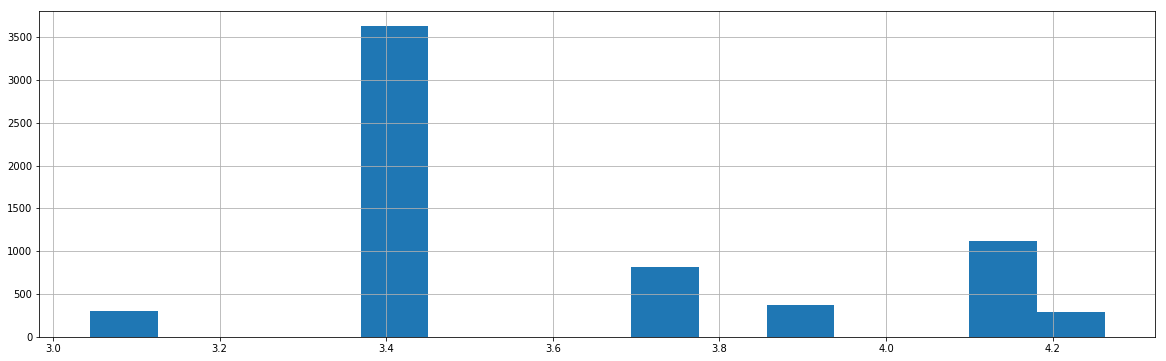

In [14]:
df_scaled_boxcox.hist(bins=15, figsize=(20, 6));

<b><u>Conclusion:</u></b><br/>
***As the distribution of both the method are almost same so we can take any of the feature scaling method to bring our data into a same range.***<br/>
***So, let's consider the min max normalization output.***

## 6. Feature Importance
### 6.1. By RFE

In [15]:
data.Speed_limit = df_scaled
data.head()

,Accident_Index,Accident_Severity,First_Road_Class,Speed_limit,Light_Conditions,Weather_Conditions,Day_of_Week_6,Day_of_Week_5,Day_of_Week_4,Day_of_Week_3,Day_of_Week_2,Day_of_Week_7,Road_Type_6,Road_Type_3,Road_Type_1,Road_Type_2,Road_Type_7,Junction_Control_4,Junction_Control_2,Junction_Control_3,Junction_Control_0,Road_Surface_Conditions_1,Road_Surface_Conditions_2,Road_Surface_Conditions_4,Road_Surface_Conditions_3,Urban_or_Rural_Area_1,Urban_or_Rural_Area_2
0,2016320136956,0.0,5.0,0.2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2016010021162,0.0,3.0,0.2,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,2016610051916,0.0,3.0,0.4,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,2016100139498,0.0,4.0,0.2,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,2016420087263,1.0,4.0,0.8,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [16]:
X = data.drop(['Accident_Index','Accident_Severity'],axis = 1)
y = data.Accident_Severity

In [17]:
lr = LogisticRegression()
lr.fit(X,y)
#stop the search when only the last feature is left
rfe = RFE(lr, n_features_to_select=1, verbose = 3 )
fit=rfe.fit(X,y)
print("Num Features: %d"% fit.n_features_) 
print("Feature Ranking: %s"% fit.ranking_)

Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Num Features: 1
Feature Ranking: [13 11 19 23 24 20 12 16 17 14  2  6  5  8  7 10  9 15  4 21 18 22 25  3
  1]


#### Our feature ranking based on our feature score

In [18]:
dict(sorted(dict(zip(X.columns,fit.ranking_)).items(), key = lambda x:x[1]))

{'Urban_or_Rural_Area_2': 1,
 'Road_Type_6': 2,
 'Urban_or_Rural_Area_1': 3,
 'Junction_Control_0': 4,
 'Road_Type_1': 5,
 'Road_Type_3': 6,
 'Road_Type_7': 7,
 'Road_Type_2': 8,
 'Junction_Control_2': 9,
 'Junction_Control_4': 10,
 'Speed_limit': 11,
 'Day_of_Week_4': 12,
 'First_Road_Class': 13,
 'Day_of_Week_7': 14,
 'Junction_Control_3': 15,
 'Day_of_Week_3': 16,
 'Day_of_Week_2': 17,
 'Road_Surface_Conditions_2': 18,
 'Light_Conditions': 19,
 'Day_of_Week_5': 20,
 'Road_Surface_Conditions_1': 21,
 'Road_Surface_Conditions_4': 22,
 'Weather_Conditions': 23,
 'Day_of_Week_6': 24,
 'Road_Surface_Conditions_3': 25}

***The top 15 features based on RFE are :***
<li>Urban_or_Rural_Area_2</li>
<li>Road_Type_6</li>
<li>Urban_or_Rural_Area_1</li>
<li>Junction_Control_0</li>
<li>Road_Type_1</li>
<li>Road_Type_3</li>
<li>Road_Type_7</li>
<li>Road_Type_2</li>
<li>Junction_Control_2</li>
<li>Junction_Control_4</li>
<li>Speed_limit</li>
<li>Day_of_Week_4</li>
<li>First_Road_Class</li>
<li>Day_of_Week_7</li>
<li>Junction_Control_3</li>

### Task 1: Use Tree-based functions to analyze the severity of traffic accidents and identify key variables.
### 6.2. By DecisionTree 

In [19]:
dtree = DecisionTreeClassifier()
dtree.fit(X,y)
dict(sorted(dict(zip(X.columns,dtree.feature_importances_)).items(), key = lambda x:x[1],reverse=True))

{'Urban_or_Rural_Area_1': 0.5730372129495093,
 'Road_Type_6': 0.4104078537021405,
 'Speed_limit': 0.0038264515801118776,
 'Road_Type_2': 0.0036296671812579783,
 'Junction_Control_0': 0.0031416645918026817,
 'Day_of_Week_4': 0.001751010925130435,
 'Road_Surface_Conditions_2': 0.0016602177660495975,
 'Light_Conditions': 0.0011358711173440963,
 'Road_Type_1': 0.0007587714008898552,
 'Road_Type_3': 0.0003983549854671745,
 'Day_of_Week_5': 0.0002529238002966183,
 'First_Road_Class': 0.0,
 'Weather_Conditions': 0.0,
 'Day_of_Week_6': 0.0,
 'Day_of_Week_3': 0.0,
 'Day_of_Week_2': 0.0,
 'Day_of_Week_7': 0.0,
 'Road_Type_7': 0.0,
 'Junction_Control_4': 0.0,
 'Junction_Control_2': 0.0,
 'Junction_Control_3': 0.0,
 'Road_Surface_Conditions_1': 0.0,
 'Road_Surface_Conditions_4': 0.0,
 'Road_Surface_Conditions_3': 0.0,
 'Urban_or_Rural_Area_2': 0.0}

***Top 15 features based on Decision Tree are:***
<li>Urban_or_Rural_Area_1</li>
<li>Road_Type_6</li>
<li>Road_Type_2</li>
<li>Speed_limit</li>
<li>Junction_Control_0</li>
<li>Light_Conditions</li>
<li>Day_of_Week_4</li>
<li>Road_Surface_Conditions_1</li>
<li>Road_Type_1</li>
<li>Road_Type_3</li>
<li>Day_of_Week_5</li>
<li>Junction_Control_2</li>
<li>Urban_or_Rural_Area_2</li>
<li>First_Road_Class</li>
<li>Road_Type_7</li>

### 6.3. By Random Forest Classifier

In [20]:
# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X, y)
feature_weightage_dict = dict()
# Print the name and gini importance of each feature
for feature in zip(X.columns, clf.feature_importances_):
    feature_weightage_dict.update({feature[0]:feature[1]})

sorted_feature_weightage_dict = sorted(feature_weightage_dict.items(), key=lambda kv: kv[1], reverse = True)
dict(sorted_feature_weightage_dict)

{'Urban_or_Rural_Area_1': 0.2751371254167683,
 'Urban_or_Rural_Area_2': 0.2675687763671991,
 'Road_Type_6': 0.1897328090676221,
 'Speed_limit': 0.09895741188131127,
 'Road_Type_1': 0.06361990738981291,
 'Road_Type_3': 0.04781133445251827,
 'Junction_Control_2': 0.012674947899221942,
 'Light_Conditions': 0.011862955122763747,
 'First_Road_Class': 0.008941175413301354,
 'Road_Type_7': 0.007718264914086424,
 'Junction_Control_0': 0.0046824762574312105,
 'Junction_Control_4': 0.0037674900875684994,
 'Road_Type_2': 0.0025979637782136333,
 'Weather_Conditions': 0.0009198168156307867,
 'Day_of_Week_4': 0.0008658269777036871,
 'Road_Surface_Conditions_2': 0.0005522861134032807,
 'Road_Surface_Conditions_1': 0.0005515909656629505,
 'Day_of_Week_5': 0.0004890291021736808,
 'Day_of_Week_6': 0.0004037883026527261,
 'Day_of_Week_3': 0.0003562705883126495,
 'Day_of_Week_7': 0.00025661867521688264,
 'Day_of_Week_2': 0.00024576625934130566,
 'Junction_Control_3': 0.00014798591212554596,
 'Road_Surface

***Top 15 features based on RandomForest are:***
<li>Urban_or_Rural_Area_1</li>
<li>Urban_or_Rural_Area_2</li>
<li>Road_Type_6</li>
<li>Speed_limit</li>
<li>Road_Type_1</li>
<li>Road_Type_3</li>
<li>Junction_Control_2</li>
<li>Light_Conditions</li>
<li>First_Road_Class</li>
<li>Road_Type_7</li>
<li>Junction_Control_0</li>
<li>Junction_Control_4</li>
<li>Road_Type_2</li>
<li>Weather_Conditions</li>
<li>Day_of_Week_4</li>

<b><u>Conclusion:</u></b><br/>
***From the above 3 feature importance methods we can clearly observe that features like Urban_or_Rural_Area_1, Urban_or_Rural_Area_2, Road_Type_6, Speed_limit, Road_Type_1, Road_Type_3, Junction_Control_2, First_Road_Class, Road_Type_7, Junction_Control_0, Junction_Control_4,Road_Type_2,Day_of_Week_4 has the higher feature importance in determining the accident severity.***

### Task 2: Use Split Data to separate training and validation data

## 7. Train-Validation Split

### 7.1. Splitting data into train and validation set

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

<br/><br/><font color="red">***As our dataset is biased towards 0 class label so we will do upsampling using SMOTE so that our trained model will not be biased towards our 0 class label.***</font><br/><br/>
### 7.2. Over-Sampling Using SMOTE

In [22]:
sm = SMOTE(random_state=2,k_neighbors=5)
X_train, y_train =sm.fit_sample(X_train,y_train)

### 7.3. Train-Validation Split after SMOTE

In [23]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_train, y_train, test_size=0.30, random_state=0)

## 8. Model Builiding And Prediction

<br/><font color="green">***Using different classification models :***</font>

In [24]:
names = ['Logistic Regression', 
         "Nearest Neighbors",
         "Decision Tree", "Random Forest",
         "Naive Bayes"]

classifiers = [LogisticRegression(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    MultinomialNB()]

In [25]:
model_dict = {}    
for name, clf in zip(names, classifiers):
    
    # traing
    clf.fit(X_train_new, y_train_new)
    # predict
    y_pred = clf.predict(X_test_new)
    # accuracy
    acc_score = accuracy_score(y_test_new,y_pred)

    model_dict[name] = {"accuracy score" : acc_score}
model_dict

{'Logistic Regression': {'accuracy score': 0.997071129707113},
 'Nearest Neighbors': {'accuracy score': 0.9899581589958159},
 'Decision Tree': {'accuracy score': 0.999581589958159},
 'Random Forest': {'accuracy score': 0.998744769874477},
 'Naive Bayes': {'accuracy score': 0.992050209205021}}

***Here we can observe that without any hyperparameter tuning our decision tree gave the accuracy as 99.96%.***<br/><br/>
***Now we will check wheather our model is overfit or not by checking the trained model with unseen data that is our X_test(Before SMOTE we have split our dataset into X_train and X_test).***

In [26]:
clf = DecisionTreeClassifier()
clf.fit(X_train_new, y_train_new)
y_pred = clf.predict(X_test)
print(" Accuracy is {:.2f}%".format(accuracy_score(y_test, y_pred)*100))

 Accuracy is 99.59%


***Here we can observe that in the unseen data our model has predicted the accident severity with 99.59%. So we can conclude that our model is not overfit and in future also it will give accuracy upto this level in unseen data.***

### Task 3: Run repetitive statements to find an optimal depth of Decision Tree and Evaluate Multiclass Classification to compare performance by depth and find an optimal depth
### Hyper-parameter tuning of the best model (Decision Tree)

In [27]:
model_dt = DecisionTreeClassifier()
max_depth = [1, 5, 10, 50, 100, 500, 1000]
min_samples_split = [2, 5, 10, 100, 500]
params_dt = {'max_depth':max_depth,'min_samples_split':min_samples_split}
ml_dt = RandomizedSearchCV(estimator=model_dt, param_distributions=params_dt,scoring='accuracy',return_train_score= True,n_jobs=-1)
bestValue = ml_dt.fit(X_train,y_train)

### Best Hyper parameter

In [28]:
bestValue.best_params_

{'min_samples_split': 2, 'max_depth': 5}

### Testing the performance of the model on test data

In [29]:
# here we are choosing the best hyper - parameter

min_samples_split = 2
max_depth = 5

dtc = DecisionTreeClassifier(min_samples_split=min_samples_split,max_depth=max_depth)
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

### Accuracy

In [30]:
print(" Accuracy is {:.2f}%".format(accuracy_score(y_test, y_pred)*100))

 Accuracy is 99.59%


<font color="red">***Here we can clearly observe that our accuracy is almost same.***</font>

### Task 4: Use Decision Tree (for depth optimization) and Random Forest (default) function to train a learning model for traffic accident data and evaluate the model performance using test data.
<center><h3>and</h3></center>

### Task 5: Use Binary Classification to validate the accuracy of respective models.

In [31]:
model_names = ["Decision Tree", "Random Forest"]

classifiers_object = [DecisionTreeClassifier(min_samples_split = 5,max_depth = 100),RandomForestClassifier()]

In [33]:
classifier_model_dict = {}    
for name, clf in zip(model_names, classifiers_object):
    
    # traing
    clf.fit(X_train, y_train)
    # predict
    y_pred = clf.predict(X_test)
    # accuracy
    acc_score = accuracy_score(y_test,y_pred)

    classifier_model_dict[name] = [acc_score]
    
model_df_variable = pd.DataFrame(classifier_model_dict, index = ['Accuracy']).T
model_df_variable = model_df_variable.sort_values(by=['Accuracy'], ascending=False)
model_df_variable

,Accuracy
Decision Tree,0.995906
Random Forest,0.991812


<font color="red">***Here we can observe that Decision Tree is performing better than RandomForest.***</font>

### Task 6 : Use filter to retain only key variables at each tree’s top node of Random Forest and sort and check key variables by assigning weight to the key variables

In [34]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
estimators = rf_model.estimators_

In [35]:
rows = []
for index,clf in enumerate(estimators):
    key_features = dict(sorted(dict(zip(X.columns,clf.feature_importances_ )).items(),key = lambda x:x[1],reverse=True))
    key_features = {k: v for (k, v) in key_features.items() if v > 0}
    rows.append(["DecisionTreeClassifier_{0}".format(int(index+1)),key_features,",".join(key_features.keys()),",".join(map(str,key_features.values()))])
    
display_tree_features = pd.DataFrame(rows,columns=["Decision Tree Estimator","Key Features","Features","Weights"],index=list(list(zip(*rows))[0])).drop(["Decision Tree Estimator"],axis=1)
display_tree_features

,Key Features,Features,Weights
DecisionTreeClassifier_1,"{'Urban_or_Rural_Area_1': 0.33401422472434794,...","Urban_or_Rural_Area_1,Speed_limit,Road_Type_6,...","0.33401422472434794,0.24164538384009696,0.1482..."
DecisionTreeClassifier_2,"{'Urban_or_Rural_Area_2': 0.7252390616277096, ...","Urban_or_Rural_Area_2,Road_Type_6,Road_Type_2,...","0.7252390616277096,0.26580658908743465,0.00394..."
DecisionTreeClassifier_3,"{'Urban_or_Rural_Area_1': 0.2972421521202719, ...","Urban_or_Rural_Area_1,Speed_limit,Road_Type_6,...","0.2972421521202719,0.26401460162070967,0.17838..."
DecisionTreeClassifier_4,"{'Urban_or_Rural_Area_1': 0.7175233614212883, ...","Urban_or_Rural_Area_1,Road_Type_6,Road_Type_2,...","0.7175233614212883,0.2695194326057582,0.007372..."
DecisionTreeClassifier_5,"{'Urban_or_Rural_Area_2': 0.6191037811355886, ...","Urban_or_Rural_Area_2,Road_Type_6,Junction_Con...","0.6191037811355886,0.2735857045543231,0.085592..."
DecisionTreeClassifier_6,"{'Road_Type_6': 0.3424703219683284, 'Urban_or_...","Road_Type_6,Urban_or_Rural_Area_2,Speed_limit,...","0.3424703219683284,0.28407908267280185,0.26651..."
DecisionTreeClassifier_7,"{'Urban_or_Rural_Area_1': 0.3010601704831565, ...","Urban_or_Rural_Area_1,Speed_limit,Road_Type_6,...","0.3010601704831565,0.2886272735556115,0.257934..."
DecisionTreeClassifier_8,"{'Urban_or_Rural_Area_2': 0.6922504032444525, ...","Urban_or_Rural_Area_2,Road_Type_1,Road_Type_3,...","0.6922504032444525,0.11679708599796267,0.11544..."
DecisionTreeClassifier_9,"{'Speed_limit': 0.32505298265858784, 'Urban_or...","Speed_limit,Urban_or_Rural_Area_1,Road_Type_6,...","0.32505298265858784,0.2087967071694195,0.16567..."
DecisionTreeClassifier_10,"{'Urban_or_Rural_Area_1': 0.7408303457076333, ...","Urban_or_Rural_Area_1,Road_Type_6,Road_Type_1,...","0.7408303457076333,0.142002417552861,0.1047320..."


## 9. Conclusions:
In the 6<sup>th</sup> section i.e., Feature Importance, we can clearly got to know that features like Urban_or_Rural_Area_1, Urban_or_Rural_Area_2, Road_Type_6, Speed_limit, Road_Type_1, Road_Type_3, Junction_Control_2, First_Road_Class, Road_Type_7, Junction_Control_0, Junction_Control_4,Road_Type_2 and Day_of_Week_4 are more responsible for accidents.
We can visualize these features in a table:<br/>
<style>
table {
  font-family: arial, sans-serif;
  border-collapse: collapse;
  width: 100%;
}

td, th {
  border: 1px solid #dddddd;
  text-align: left;
  padding: 8px;
}

tr:nth-child(even) {
  background-color: #dddddd;
}
</style>
<table>
  <tr>
    <th>Sl no.</th>
    <th>Key Features</th>
  </tr>
  <tr>
    <td>1</td>
    <td>Urban_or_Rural_Area_1</td>
  </tr>
  <tr>
    <td>2</td>
    <td>Urban_or_Rural_Area_2</td>
  </tr>
  <tr>
    <td>3</td>
    <td>Road_Type_6</td>
  </tr>
  <tr>
    <td>4</td>
    <td>Speed_limit</td>
  </tr>
  <tr>
    <td>5</td>
    <td>Road_Type_1</td>
  </tr>
  <tr>
    <td>6</td>
    <td>Road_Type_3</td>
  </tr>
  <tr>
    <td>7</td>
    <td>Junction_Control_2</td>
  </tr>
  <tr>
    <td>8</td>
    <td>First_Road_Class</td>
  </tr>
  <tr>
    <td>9</td>
    <td>Road_Type_7</td>
  </tr>
  <tr>
    <td>10</td>
    <td>Junction_Control_0</td>
  </tr>
  <tr>
    <td>11</td>
    <td>Junction_Control_4</td>
  </tr>
  <tr>
    <td>12</td>
    <td>Road_Type_2</td>
  </tr>
  <tr>
    <td>13</td>
    <td>Day_of_Week_4</td>
  </tr>
</table>